In [1]:
res_dir = 'results/2GRU-128-L8-L6-bs32'
seeds = [23, 89, 196, 27863]
import json
from os.path import exists

for i in seeds:
  ff = f"{res_dir}/seed{i}/overview.json"
  if not exists(ff):
    overview = {}
  else:
    with open(ff,'r') as f:
      overview = json.load(f)
    

  print(f"{overview.get('train_accuracy','')}")
  print(f"{overview.get('val_accuracy','')}")
  print(f"{overview.get('test_accuracy','')}")
  print()

In [12]:
import csv
import matplotlib.pyplot as plt

def get_metrics(res_dir):
  with open(f"{res_dir}/trainlog.csv") as f:
    reader = csv.reader(f)
    keys =next(reader)
    metrics = {k:[] for k in keys}
    
    for row in reader:
      for k,v in zip(keys, row):
        metrics[k].append(float(v))
  return metrics

all_keys = [
  ['accuracy', 'val_accuracy',],# 'test_accuracy'],
  ['total_g_loss', 'c_loss', 'g_loss', 'imp_loss', 'reg_loss'],
  ['val_total_g_loss', 'val_c_loss', 'val_g_loss', 'val_imp_loss', 'val_reg_loss'],
  #['test_total_g_loss', 'test_c_loss', 'test_g_loss', 'test_imp_loss', 'test_reg_loss'],
  #['d_loss','val_d_loss', 'test_d_loss'],
  #['reg_loss']
]

def fmt_metrics_at_epoch(m, epoch):
  acc = m['accuracy'][epoch] * 100
  val_acc = m['val_accuracy'][epoch] * 100
  #test_acc = m['test_accuracy'][epoch] * 100
  return f"{acc:.1f}, v:{val_acc:.1f}" #, t:{test_acc:.1f}"

def print_overview(m):
  max_val = m['val_accuracy'].index(max(m['val_accuracy']))
  max_train = m['accuracy'].index(max(m['accuracy']))  
  print(f"maxVal(e:{max_val} [{fmt_metrics_at_epoch(m, max_val)}]) maxTrain(e:{max_train} [{fmt_metrics_at_epoch(m, max_train)}])")


def plot_all(metrics):
    n = len(all_keys)
    plt.rcParams["figure.figsize"] = (n*4,3)
    plt.subplots(1,n)
    for i, keys in enumerate(all_keys):
      plt.subplot(1,n, i+1)
      for key in keys:
        data = metrics.get(key, [])
        plt.plot(range(len(data)),data, label=key)
      plt.legend()

    plt.tight_layout()
    print_overview(metrics)
    return plt.show()
      
   

## Week 49
### Light AJRNN

maxVal(e:424 [86.4, v:62.5]) maxTrain(e:426 [86.4, v:62.5])


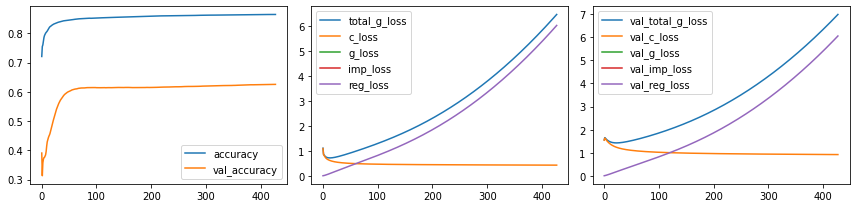

In [23]:
plot_all(get_metrics('results/week49/G-LIGHT-GRU128-G1-LR8-B32-REG/seed89')) # sophia

In [22]:
plot_all(get_metrics('results/week49/G-LIGHT-GRU128-G1-LR8-B32-REG/seed196')) # sophia

FileNotFoundError: [Errno 2] No such file or directory: 'results/week49/G-LIGHT-GRU128-G1-LR8-B32-REG/seed196/trainlog.csv'

maxVal(e:123 [92.1, v:22.7]) maxTrain(e:117 [99.0, v:6.8])


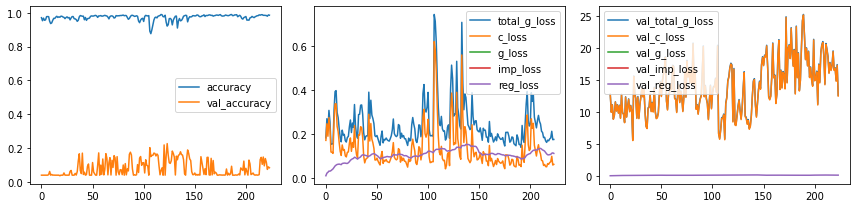

In [19]:
plot_all(get_metrics('results/week49/G-LIGHT-GRU128-G1-LR3-B32-REG/seed89')) # sophia

maxVal(e:163 [92.5, v:34.4]) maxTrain(e:249 [98.8, v:2.5])


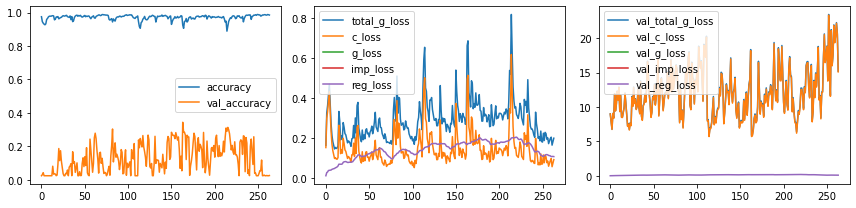

In [20]:
plot_all(get_metrics('results/week49/G-LIGHT-GRU128-G1-LR3-B32-REG/seed196')) # sophia

maxVal(e:125 [83.4, v:80.1]) maxTrain(e:137 [85.9, v:67.9])


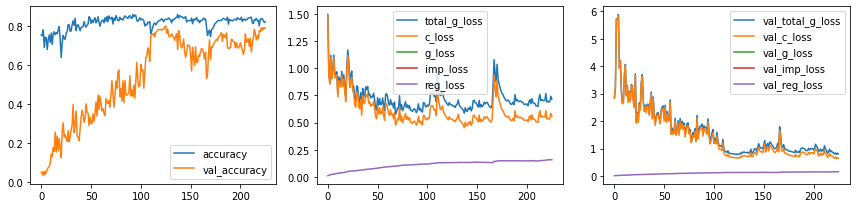

In [24]:
plot_all(get_metrics('results/week49/G-LIGHT-GRU128-G1-LR3-BS256-REG/seed89')) # sophia

maxVal(e:63 [75.9, v:77.8]) maxTrain(e:42 [87.3, v:38.2])


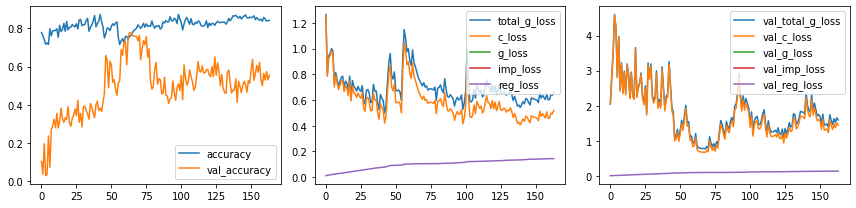

In [25]:
plot_all(get_metrics('results/week49/G-LIGHT-GRU128-G1-LR3-BS256-REG/seed196')) # sophia

# Simple GRU

maxVal(e:194 [98.2, v:18.3]) maxTrain(e:202 [98.8, v:4.1])


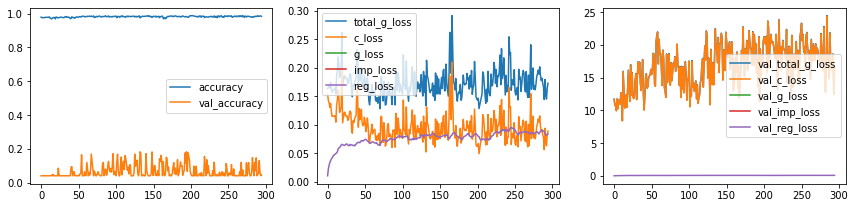

In [15]:
plot_all(get_metrics('results/week49/LIGHT-GRU128-G1-LR3-BS32-REG/seed89')) # sophia

maxVal(e:145 [84.8, v:46.1]) maxTrain(e:190 [89.0, v:23.5])


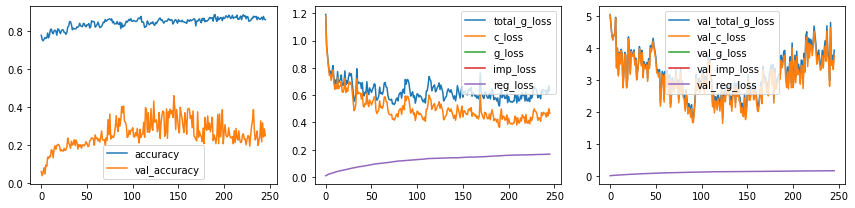

In [13]:
plot_all(get_metrics('results/week49/LIGHT-GRU128-G1-LR3-BS256-REG-DROP/seed89')) # sophia

maxVal(e:106 [85.2, v:59.7]) maxTrain(e:143 [88.4, v:38.4])


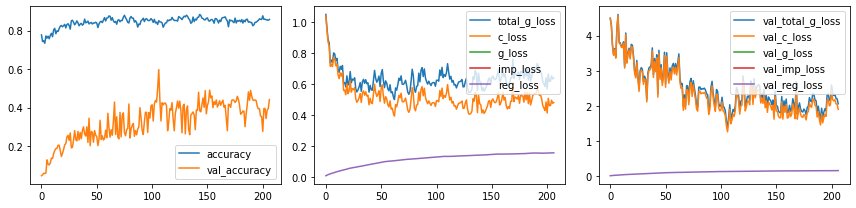

In [14]:
plot_all(get_metrics('results/week49/LIGHT-GRU128-G1-LR3-BS256-REG/seed89')) # sophia

## Week 48
### GRU128-G5-LR6-BS256

maxVal(e:302 [87.3, v:72.0, t:77.6]) maxTrain(e:599 [89.2, v:69.0, t:74.5])


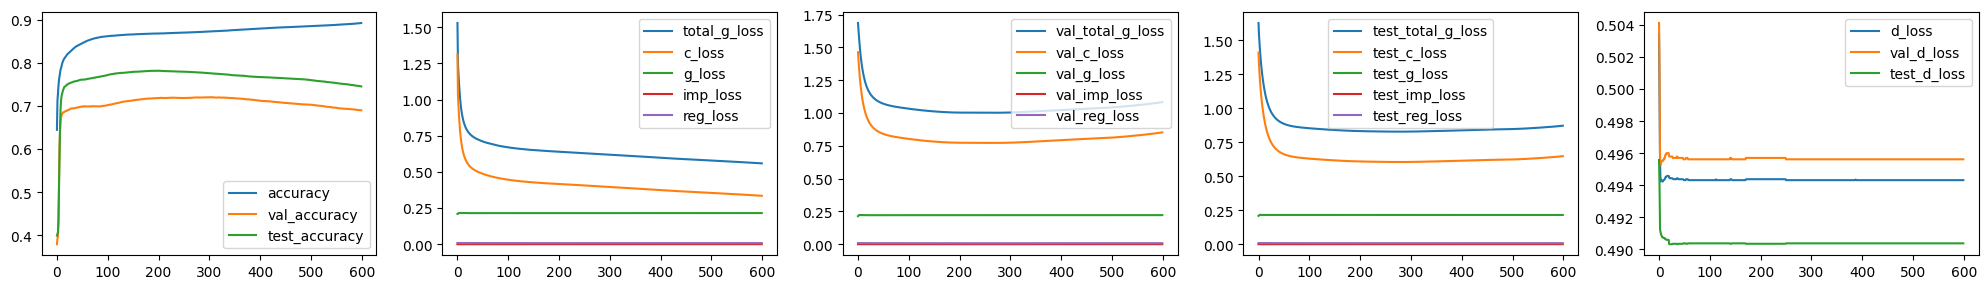

In [22]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS256/seed89')) # sophia

maxVal(e:106 [88.0, v:74.4, t:69.2]) maxTrain(e:599 [90.7, v:69.1, t:54.3])


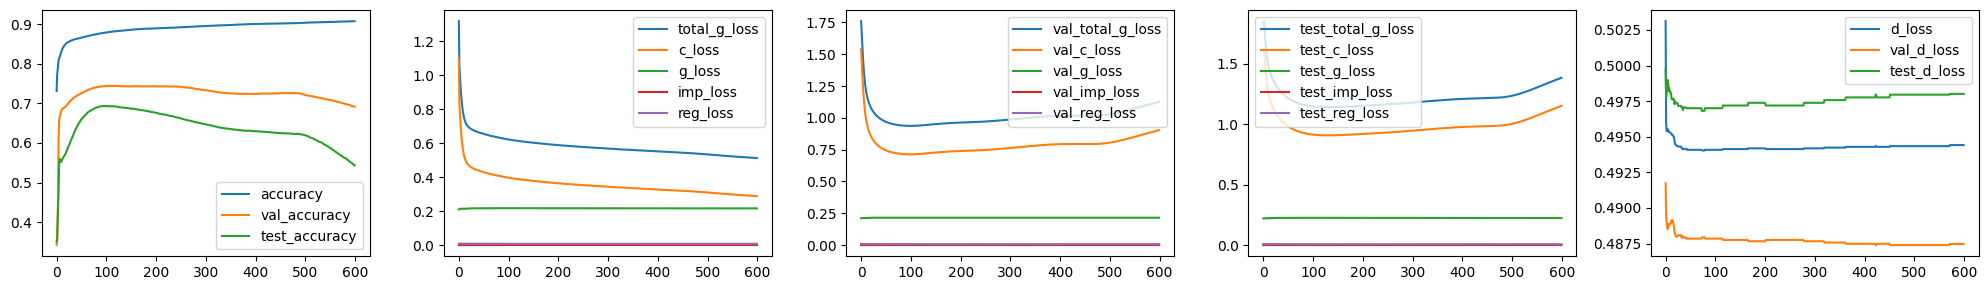

In [23]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS256/seed27836')) # sophia

maxVal(e:89 [85.8, v:76.8, t:76.6]) maxTrain(e:599 [88.1, v:73.1, t:73.6])


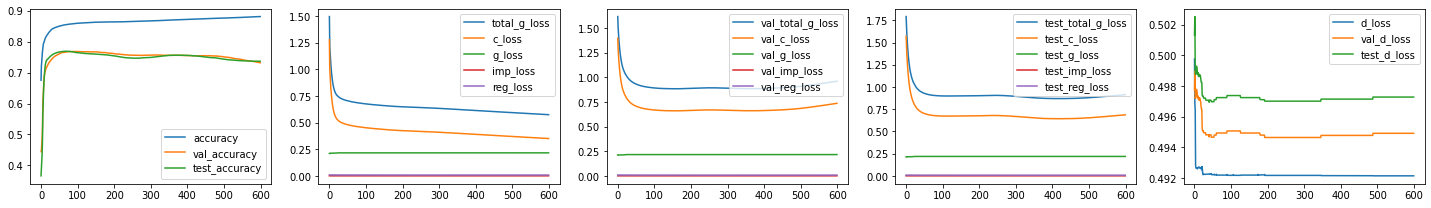

In [42]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS256/seed196')) # imac

### GRU128-G5-LR6-BS256-REG-DROP

maxVal(e:255 [87.0, v:78.1, t:77.3]) maxTrain(e:599 [89.7, v:67.4, t:69.6])


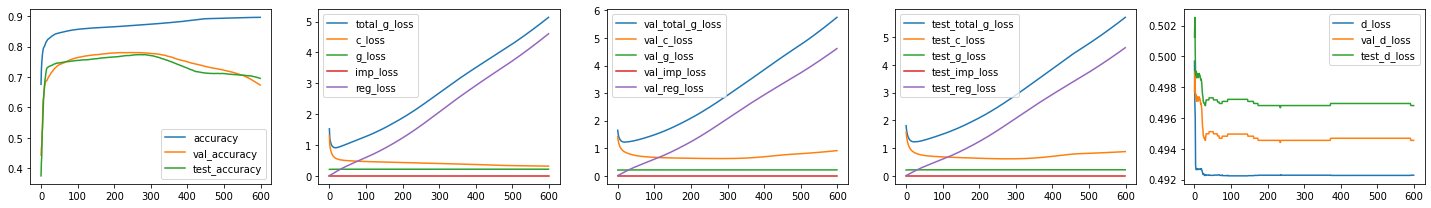

In [52]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS256-REG-DROP/seed196')) # imac

maxVal(e:46 [84.8, v:71.2, t:76.8]) maxTrain(e:599 [89.3, v:63.2, t:69.3])


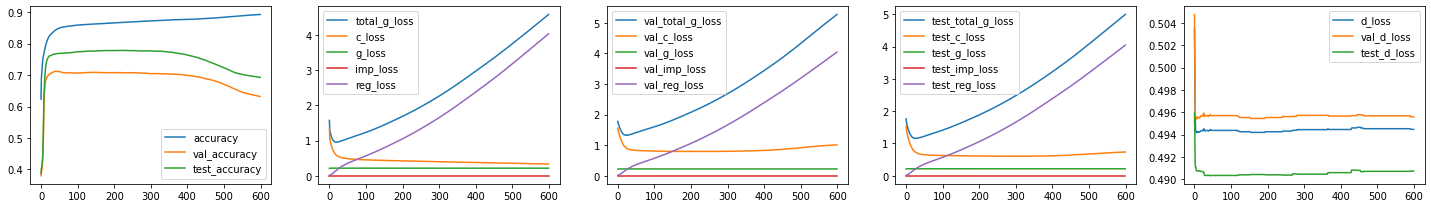

In [53]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS256-REG-DROP/seed89')) # imac

### GRU128-G5-LR6-BS32

maxVal(e:6 [90.7, v:27.8, t:29.6]) maxTrain(e:599 [99.4, v:16.4, t:16.9])


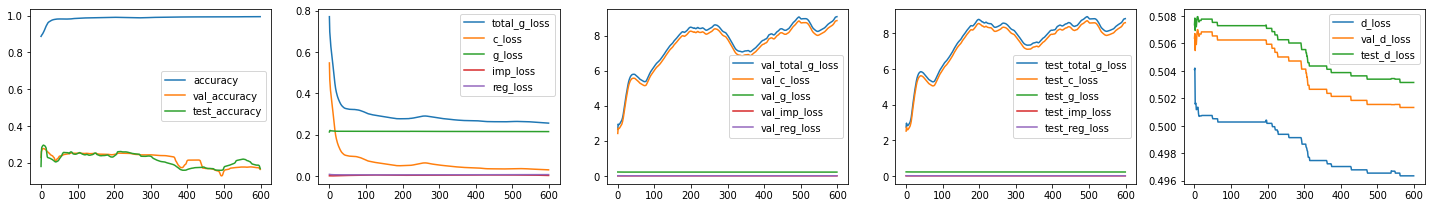

In [43]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS32/seed196')) # imac

maxVal(e:23 [95.1, v:19.1, t:28.8]) maxTrain(e:537 [99.5, v:18.0, t:26.9])


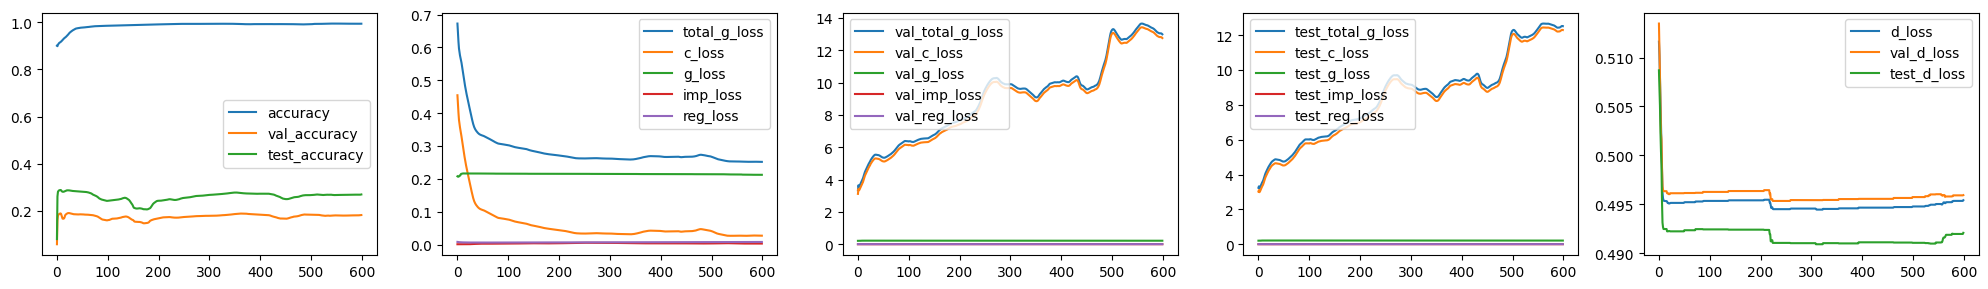

In [3]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS32/seed89')) # sophia

### GRU128-G1-LR6-BS256

maxVal(e:598 [85.5, v:83.7, t:84.9]) maxTrain(e:599 [85.5, v:83.7, t:84.9])


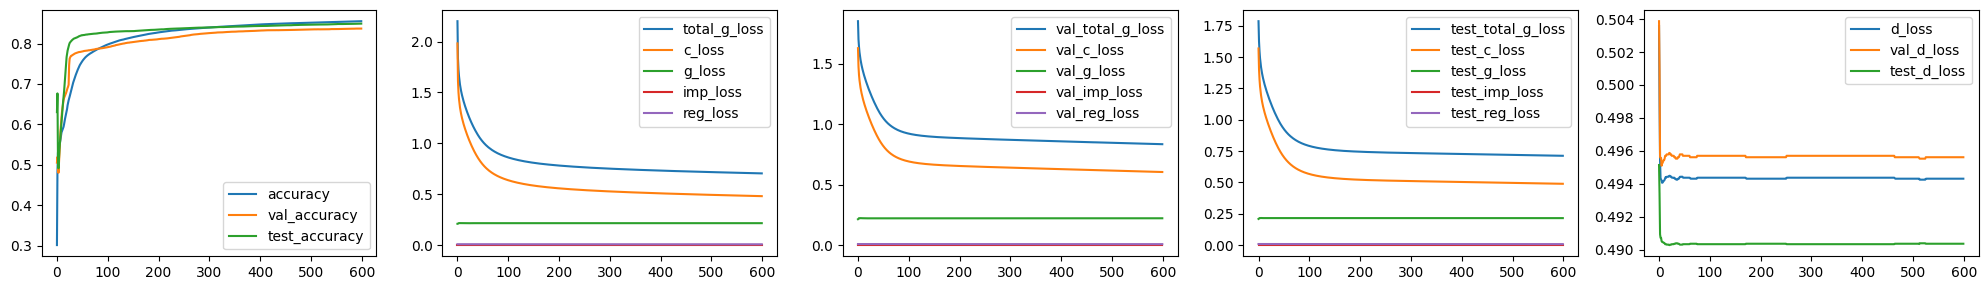

In [25]:
plot_all(get_metrics('results/week48/GRU128-G1-LR6-BS256/seed89')) # sophia

maxVal(e:598 [85.5, v:81.9, t:76.2]) maxTrain(e:599 [85.5, v:81.9, t:76.2])


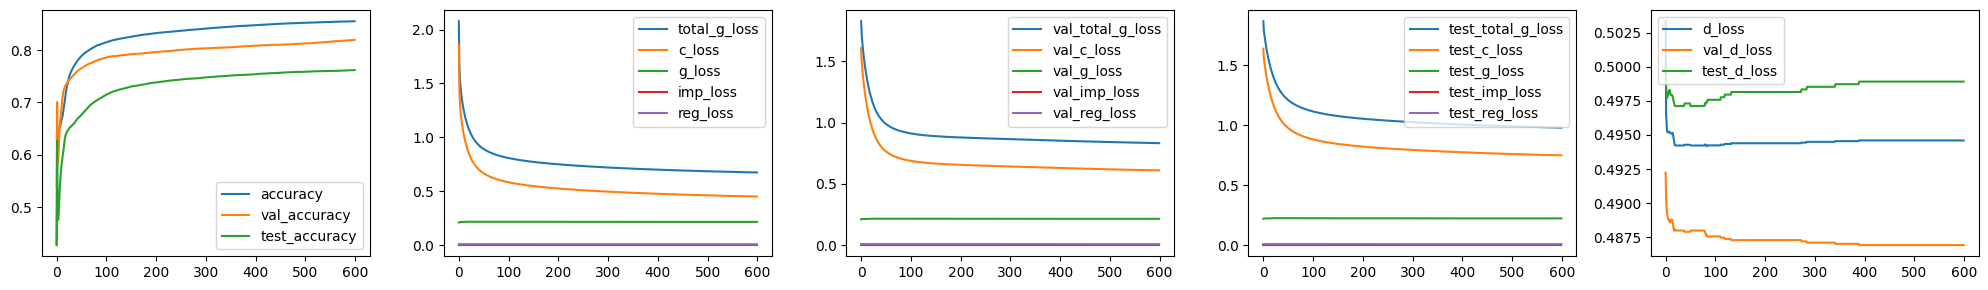

In [4]:
plot_all(get_metrics('results/week48/GRU128-G1-LR6-BS256/seed27836')) # sophia

### GRU128-G1-LR6-BS32

maxVal(e:44 [88.2, v:67.4, t:57.7]) maxTrain(e:599 [92.2, v:33.9, t:23.4])


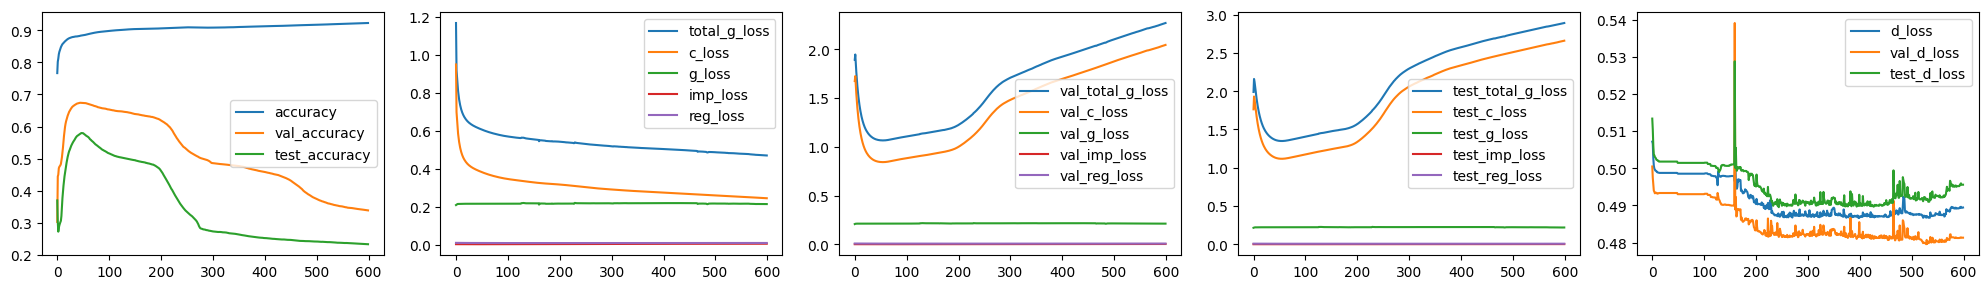

In [29]:
plot_all(get_metrics('results/week48/GRU128-G1-LR6-BS32/seed27836')) # sophia

maxVal(e:22 [84.2, v:63.6, t:70.7]) maxTrain(e:414 [91.8, v:45.5, t:54.7])


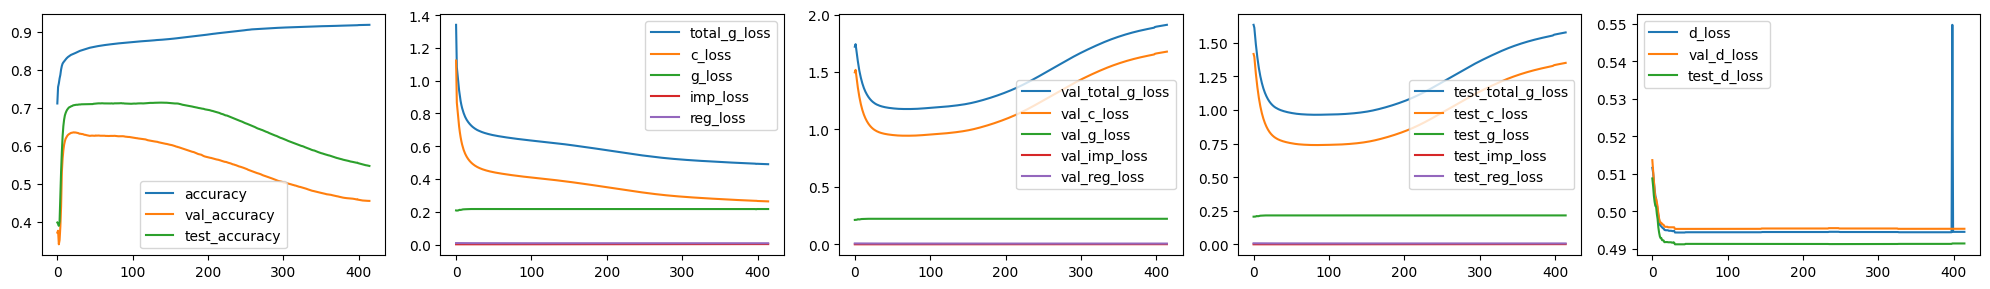

In [3]:
plot_all(get_metrics('results/week48/GRU128-G1-LR6-BS32/seed89')) # sophia

### GRU128-G1-LR3-BS256

maxVal(e:599 [97.9, v:87.7, t:82.5]) maxTrain(e:585 [98.0, v:86.5, t:81.8])


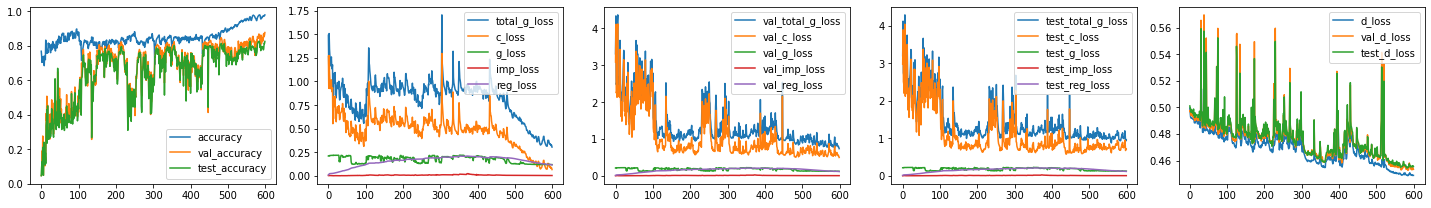

In [57]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS256/seed196')) # imac

In [ ]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS256/seed89')) # sophia

In [ ]:
### GRU128-G1-LR3-BS256-REG-DROP

maxVal(e:587 [97.8, v:87.1, t:88.3]) maxTrain(e:593 [99.4, v:85.7, t:87.6])


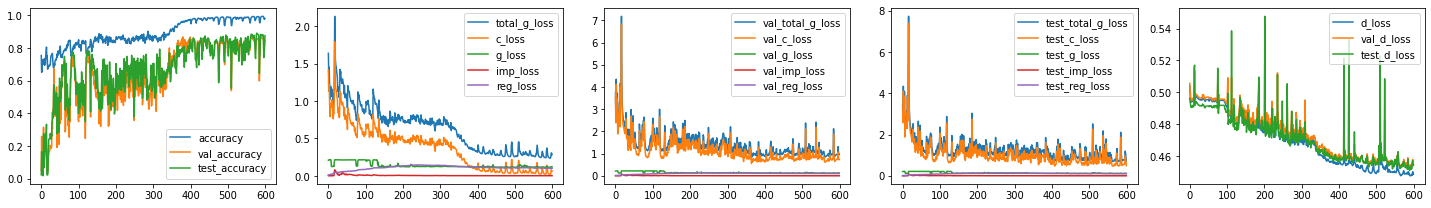

In [46]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS256-REG-DROP/seed89')) # imac

maxVal(e:577 [85.3, v:84.5, t:82.6]) maxTrain(e:196 [89.8, v:42.1, t:45.7])


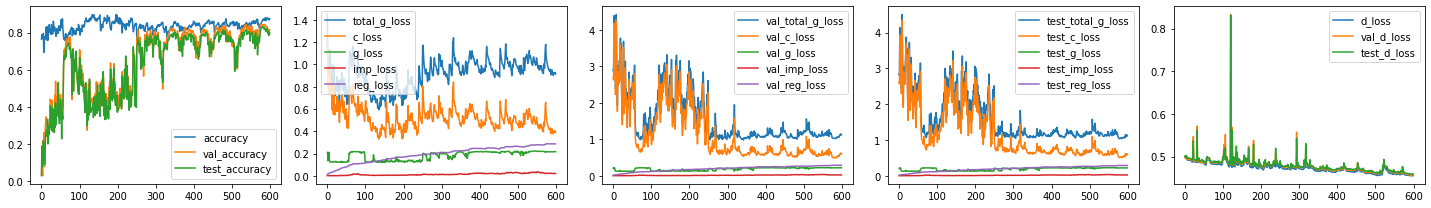

In [55]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS256-REG-DROP/seed196')) # imac

### GRU128-G1-LR3-BS32-REG-DROP

maxVal(e:305 [97.8, v:20.4, t:29.3]) maxTrain(e:553 [99.0, v:4.1, t:4.9])


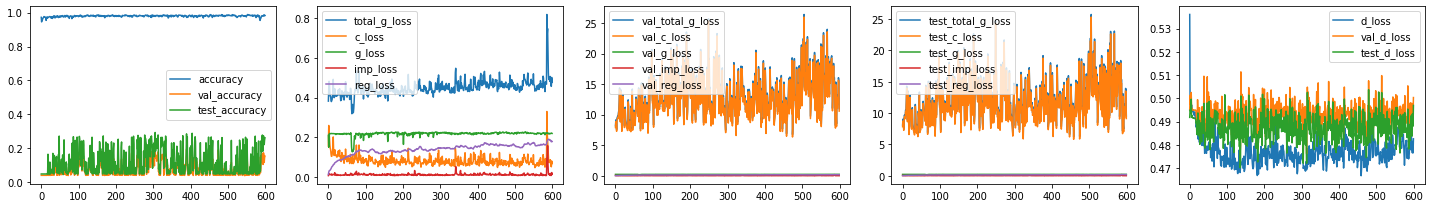

In [47]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS32-REG-DROP/seed89')) # imac

### GRU128-G1-LR3-BS256-REG

maxVal(e:584 [96.1, v:83.9, t:76.2]) maxTrain(e:595 [96.7, v:72.8, t:71.8])


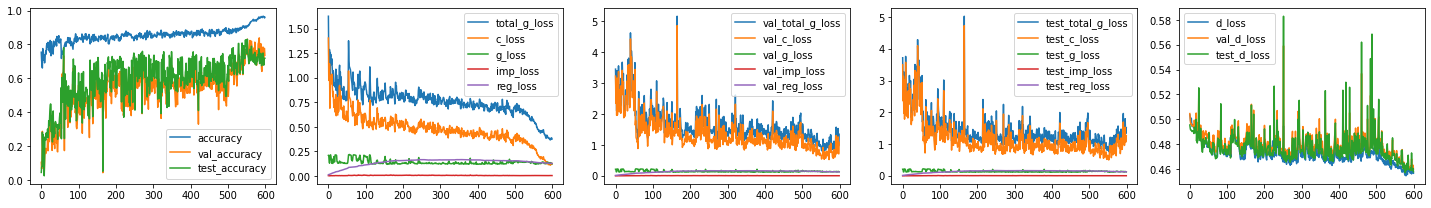

In [48]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS256-REG/seed89')) # imac

maxVal(e:520 [87.9, v:84.9, t:81.1]) maxTrain(e:588 [94.4, v:77.5, t:77.3])


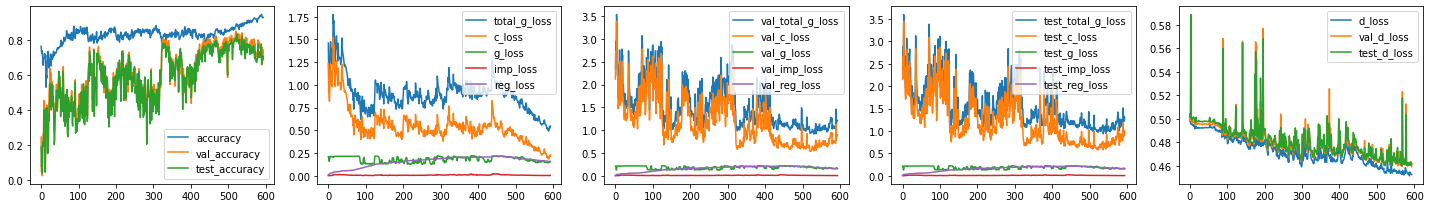

In [54]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS256-REG/seed196')) # imac

In [ ]:
### GRU128-G1-LR3-BS32-REG

maxVal(e:491 [98.2, v:20.6, t:30.1]) maxTrain(e:450 [98.9, v:5.2, t:8.1])


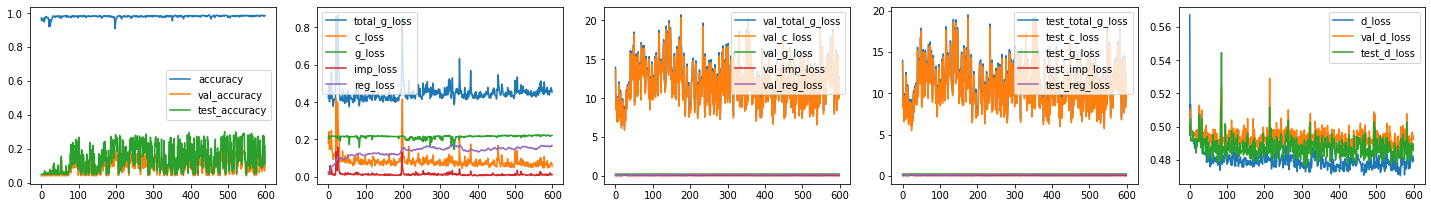

In [49]:
plot_all(get_metrics('results/week48/GRU128-G1-LR3-BS32-REG/seed89')) # imac

### GRU128-G5-LR6-BS32-REG-DROP

maxVal(e:10 [93.0, v:18.9, t:28.9]) maxTrain(e:247 [99.4, v:16.9, t:26.7])


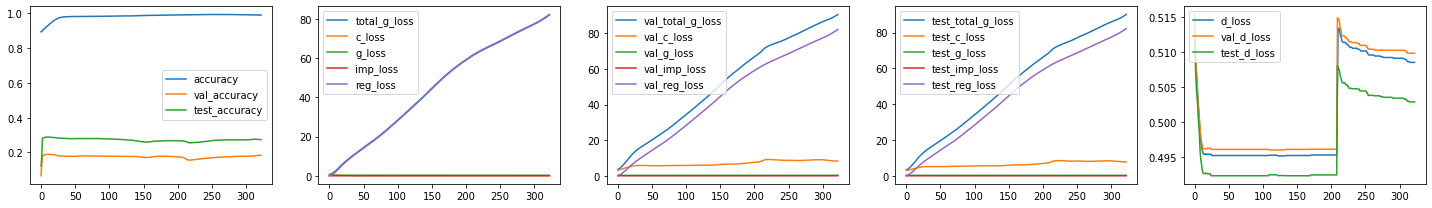

In [64]:
plot_all(get_metrics('results/week48/GRU128-G5-LR6-BS32-REG-DROP/seed89')) # imac

# Week 47

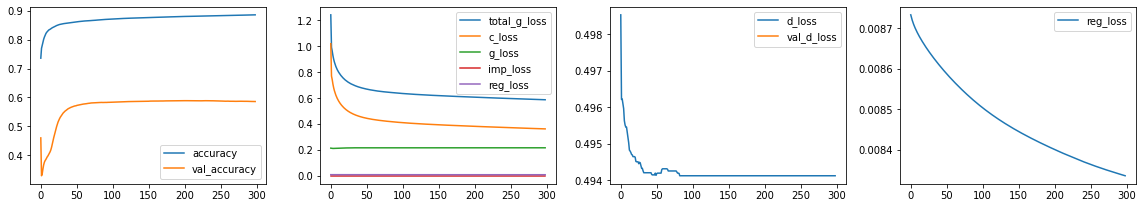

In [26]:
plot_all(get_metrics('results/week47/GRU128-LR7-BS128/seed89'))

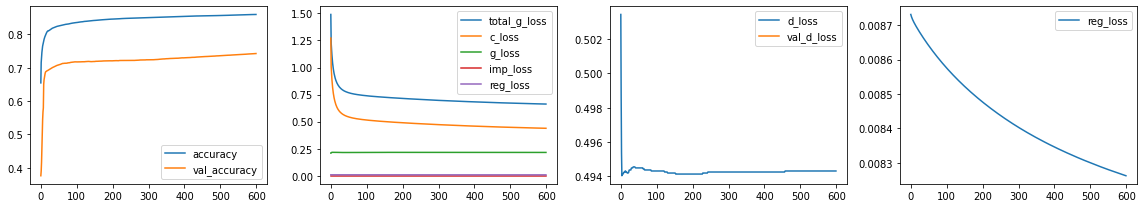

In [27]:
plot_all(get_metrics('results/week47/GRU128-LR7-BS256/seed89'))

In [9]:
plot_all(get_metrics('results/week47/GRU128-LR8-BS128/seed89'))

FileNotFoundError: [Errno 2] No such file or directory: 'results/week47/GRU128-LR8-BS128/seed89/trainlog.csv'

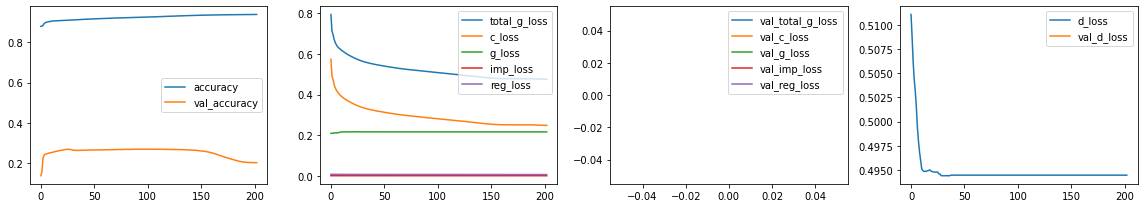

In [10]:
plot_all(get_metrics('results/week47/GRU128-LR7-BS32/seed89'))

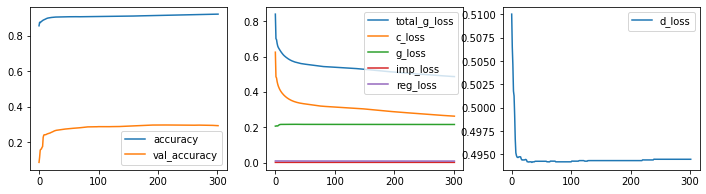

In [7]:
plot_all(get_metrics('results/week47/GRU128-LR7-BS64/seed89'))

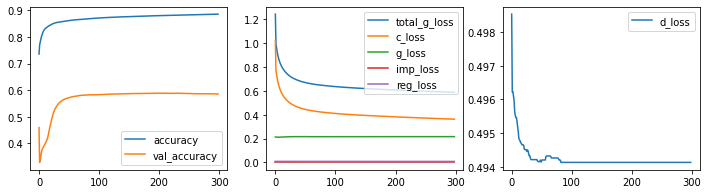

In [8]:
plot_all(get_metrics('results/week47/GRU128-LR7-BS128/seed89'))

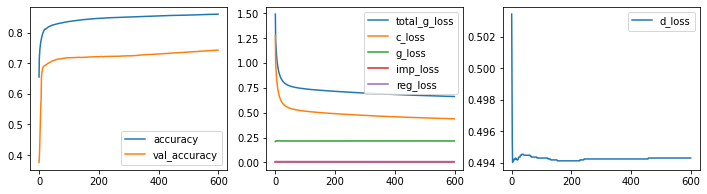

In [9]:
plot_all(get_metrics('results/week47/GRU128-LR7-BS256/seed89'))